# CAPSTONE 
## Data Exploration for the MRI Brain Tumor Classifier
### By: Bilal Munir

The objective of this project is to build a model that can classify a Brain MRI as having a tumor or not. And if it does have a tumor, which one does it have? Kaggle showed 44 different classes of tumors.

In [1]:
# Importing all the Necessary Libraries
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# SKLEARN Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import glob
import zipfile

Unzipping the image data archive with glob and zipfile

In [2]:
#files = glob.glob('data/*.zip')
#files

In [3]:
#for file in files:
#    print('Unzipping:', file)
    
#    with zipfile.ZipFile(file, 'r') as zip_ref:
#        zip_ref.extractall('data/raw')

Loading the First Image Ever to see how it looks. First as a numpy.

In [4]:
one_img = np.asarray(Image.open('data/raw/_NORMAL T1/0a0bc6879f5d5d14c4df229b64b801_big_gallery.jpeg'))
print(repr(one_img))

array([[4, 4, 4, ..., 4, 4, 3],
       [4, 4, 4, ..., 4, 4, 3],
       [4, 4, 4, ..., 4, 4, 3],
       ...,
       [4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 2]], dtype=uint8)


Plotting the first image using plt.imshow()

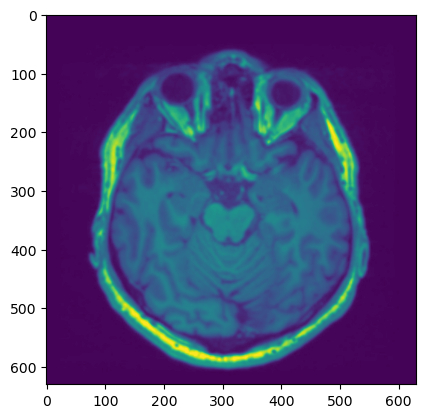

In [5]:
imgplot = plt.imshow(one_img)

The plot gives this purplish/Greenish hue and not the black and white format that I was initially expecting.

I learned that in order to view this image in the gray scale format that I desire, I would have to adjust the parameters of the *plt.imshow()* function like so,

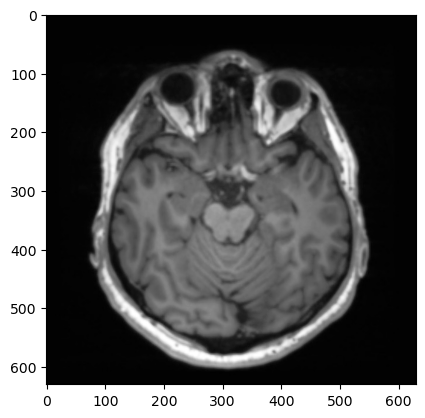

In [6]:
imgplot = plt.imshow(255 - one_img, cmap='Greys')

In [7]:
one_img.shape

(630, 630)

In order to explore this dataset we will need to utilize the **os library**. It will help us retrieve the file paths for each image.

In [8]:
# Importing the os library
import os

In [9]:
# Displaying the different classes of images
Category_List = os.listdir('data/raw')
Category_List

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T1',
 'Ependimoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T1',
 'Ganglioglioma T1C+',
 'Ganglioglioma T2',
 'Germinoma T1',
 'Germinoma T1C+',
 'Germinoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Granuloma T1',
 'Granuloma T1C+',
 'Granuloma T2',
 'Meduloblastoma T1',
 'Meduloblastoma T1C+',
 'Meduloblastoma T2',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1',
 'Tuberculoma T1C+',
 'Tuberculoma T2',
 '_NORMAL T1',
 '_NORMAL T2']

Here we see the displayed classes of folders which contains **14 different classes of tumors**, Astrocitoma, Carcinoma, Ependimoma etc.

We notice that each class of Tumor is divided into 3 separate sections (T1, T1C+ and T2). These are MRI weightings which highlight different parts of the brain. T1 weighted images are able to highlight areas with subcutaneous fat

In [10]:
type(Category_List)

list

In [11]:
# Displaying the number of classes
len(Category_List)

44

In [12]:
# Number of images per class folder.
Num_Images = []
for category in Category_List:
    num_files = len(os.listdir(f'data/raw/{category}'))
    Num_Images.append(num_files)
    
Num_Images

[176,
 233,
 171,
 66,
 112,
 73,
 45,
 48,
 57,
 20,
 18,
 23,
 27,
 40,
 33,
 55,
 94,
 55,
 30,
 31,
 17,
 23,
 67,
 41,
 272,
 369,
 233,
 130,
 223,
 104,
 86,
 72,
 66,
 66,
 108,
 63,
 148,
 194,
 123,
 28,
 84,
 33,
 251,
 271]

In [13]:
# Total number of images
sum(Num_Images)

4479

Plotting a simple bar graph showcasing the amount of images per class

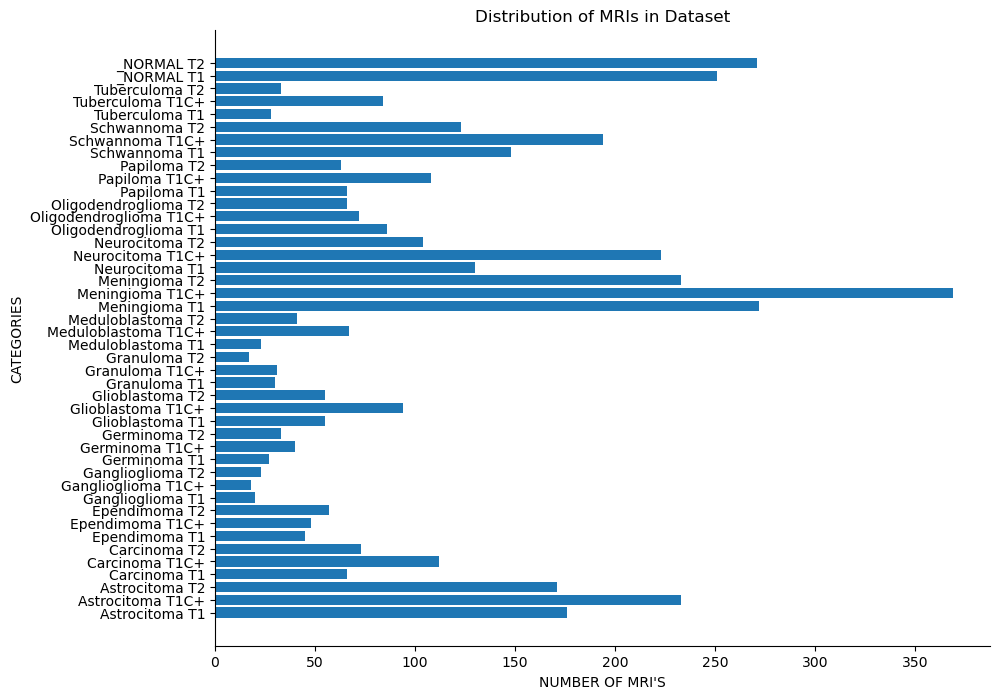

In [14]:
plt.figure(figsize=(10,8))
plt.barh(Category_List, Num_Images)

plt.title('Distribution of MRIs in Dataset')
plt.xlabel("NUMBER OF MRI'S")
plt.ylabel('CATEGORIES')

sns.despine()
plt.show()

Creating a dictionary that attaches individual images to their respective Classes. For example, all the 

In [15]:
file_paths = {}
for category in Category_List:
    file_paths[category] = []
    for file in os.listdir(f'data/raw/{category}'):
       # print(f'data/raw/{category}/{file}')
        
        file_paths[category].append(f'data/raw/{category}/{file}')
file_paths

{'Astrocitoma T1': ['data/raw/Astrocitoma T1/005_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/006_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5d8520f5a0500e22624a400948250b05f2ae0a1f177_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/02df132a56dfb89ece42ee8d195a16_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/044d8d9984902ca03e652a6f042c57_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/05899aa824a60c863097d3c9105009c18e25246abea155839c216ceab0273a18_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1492ae4325c115eccae71ebb3e995907dbef123dfd9ed8a32d7f8a64bb03115b_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/18e851456478d638929d5109489574_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1b829d504373126112d3a30ca488a6_big_gallery.jpeg',
  'data/raw/Astrocitoma T1/1c0238417532d40ffca1c26042

In [16]:
imgs = []
classification = []
file_names = []
for key, item in file_paths.items():
    
    for file_name in item:
        print(key, file_name)
        
        # Opening the images
        img = Image.open(file_name)
        
        # Resizing the images to 224x224
        img = img.resize((224, 224))
        
        # Converting images to grey scale
        img = img.convert(mode='L')
        
        # Loading the normalized image
        load_img = np.asarray(img)
        
        # then append grey images
        file_names.append(file_name)
        imgs.append(load_img)
        classification.append(key)

Astrocitoma T1 data/raw/Astrocitoma T1/005_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/006_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5d8520f5a0500e22624a400948250b05f2ae0a1f177_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/02df132a56dfb89ece42ee8d195a16_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/044d8d9984902ca03e652a6f042c57_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/05899aa824a60c863097d3c9105009c18e25246abea155839c216ceab0273a18_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/0c14dccd685d7ce330d14fa7a1f53dc756e73aff2f03afc1b09a7efc410f1804_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/0fbe78c3db179f94296e3b3d8c05fb_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/1492ae4325c115eccae71ebb3e995907dbef123dfd9ed8a32d7f8a64bb03115b_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/18e851456478d638929d5109489574_big_gallery.jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/1b829d504

Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (11).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (11).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (12).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (12).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (13).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (13).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (14).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (14).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (15).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (15).jpg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (16).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (17).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (18).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (19).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (2).jpeg
Astrocitoma T1 data/raw/Astrocitoma T1/astro_infraT (2).jpg
Astrocitoma T1 d

Astrocitoma T1C+ data/raw/Astrocitoma T1C+/112_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/113_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/12310d24d848f707ed7674e5e3414b_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/13989b9b62eee23e2f52d95fae66d71aa5099485d864c9379f17e10d739c4b73_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/13cb18c4f838d399687c21700188ac4232102e5fda81f33149c8548191eb0cf2_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/14fda1ba9c19ffff35499fcd62752d_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/158c06b16914d216641ccae5b41c37_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/17c12db56fa89df2974e53e2a0ff7d_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1808d422d0674d44d96e5b09843d4f_big_gallery.jpg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1d462b782da501f4711bb35a423188_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/1eb0bce38c890f4c047106e4bf54f5_big

Astrocitoma T1C+ data/raw/Astrocitoma T1C+/6a26da1bf18238c4143b8beec9d6bd_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/6cca2f0216bba2d0e1998826161b44_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/6ccfd0b707a4188920eee9e47101ae_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/6d6d3f32b292976ae220e88a8a162f27f1f55419cdbcb8fdeec049047be962f3_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/6eaa8fda55c7ffafb90e0e956e9587031d4becec85c6365f0f483b7acfaa5057_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/70e81d5eb1715a9520c74be3b7d403_big_gallery.jpg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/723e5e39ae6dfb80910f4cfd3b271780da35ef24f11d3ae6fec672c7a9231d53_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/72e75442b6f7715b74b3fcbe6e6d54_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/74797d1ba15d11a55fae9538e0f532_big_gallery.jpg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/7a97edfd6cc75ee08965c8cd85d702_big_gal

Astrocitoma T1C+ data/raw/Astrocitoma T1C+/fb60cc55c75b125ca987097d2b84f0_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IM0006_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IM0007_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IM0008_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IM0009_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IM0010_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IM0011_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IM0012_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0007-00008_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0007-00009_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0007-00010_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0007-00011_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0007-00012_big_gallery.jpeg
Astrocitoma T1C+ data/raw/Astrocitoma T1C+/IMG-0007-00013_big_gal

Astrocitoma T2 data/raw/Astrocitoma T2/75c78f47dbb7dda2c372a371106457e501db1e76cde1c69afb834a21684c41c3_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/7679432a7d1ef9dfeb2911fe4b3888_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/77d9b981d80319ffaa9e76d9baa8ec_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/798bcfdaf719781fd4c1b8195c89c8_big_gallery.jpg
Astrocitoma T2 data/raw/Astrocitoma T2/7c375a7f78f44211341b023451f4a9a1ec351f22ddf73d85c6bac0e15b34fdf4_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/7ce8c07bd05012a959ef314c48ed70_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/7d3369b1bdd90da4acfe23b5777f7d_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/7fed4c9656d608f3b956fef3693871_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/8173f29df1a55c7d2547bebe71287e_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/8ac92baf14eb41c7d6415e80d5afa6_big_gallery.jpeg
Astrocitoma T2 data/raw/Astrocitoma T2/8b624900ca61c47101de9b73

Carcinoma T1 data/raw/Carcinoma T1/123._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/1f7b62094c98cd1b6ea2cbe2ee93db_big_gallery.JPG
Carcinoma T1 data/raw/Carcinoma T1/2022-06-09 14_10_31-Window.jpg
Carcinoma T1 data/raw/Carcinoma T1/2022-06-09 14_10_34-Window.jpg
Carcinoma T1 data/raw/Carcinoma T1/24d919f309170d909a749bbb1c54bb_big_gallery.jpg
Carcinoma T1 data/raw/Carcinoma T1/66._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/67._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/68._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/69._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/70._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/71._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/72._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/73._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/74._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/75._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma T1/76._big_gallery.jpeg
Carcinoma T1 data/raw/Carcinoma

Carcinoma T1C+ data/raw/Carcinoma T1C+/f.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/g.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/h.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/i.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/j.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/jutyhrggth.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/k.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/l.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/m.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/n.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/o.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/re65the65yh6e.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/rt67ur76tu.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/s.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/trdh6ye65yh.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/u.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/v.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/x.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/yw54y.jpeg
Carcinoma T1C+ data/raw/Carcinoma T1C+/z.jpeg
Carcinoma T2 data/raw/Carcinoma T2/0

Ependimoma T1 data/raw/Ependimoma T1/bf09c24b0a36f8ab591f8b9e9ee2c5_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/c7c70141ef7b2cea735a73bab88f97_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/cf44f513abeffbc2f6160683e6eb3e_big_gallery.jpg
Ependimoma T1 data/raw/Ependimoma T1/d1d5bed7a94acc05ac6ef7d1dd21a6_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/d918806ce0a21335116bd0e72797f9_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/e9199e8ec6eb46ec4bfad9b5c2be05_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/eacbe7eb1bada019a29a26dfc9c5b6_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/ecdf35fb96b10351f74eba1c07e826_big_gallery.jpeg
Ependimoma T1 data/raw/Ependimoma T1/f779571b1a15ea30a6c6735820fe12_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/0b6959efc6210234fa9457c300436a_big_gallery.jpeg
Ependimoma T1C+ data/raw/Ependimoma T1C+/15ad1dd61ed3f552c2ede940e44010_big_gallery.jpg
Ependimoma T1C+ data/raw/Ependimoma T1C+/1b1d8465e93e343a8e

Ependimoma T2 data/raw/Ependimoma T2/b32856778f8e49b306b406c18570f7_big_gallery.jpg
Ependimoma T2 data/raw/Ependimoma T2/c374918229d8364e0806c2dd4de316_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/c43b54b4da1d6a07e1006ef1ea54ee_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/c4910a0312cd2ae1e2b971835665ea_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/c65b3b48fe64319ea27e603d813277_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/c78c4b33c131168baf8b8ee5db85be_big_gallery.jpg
Ependimoma T2 data/raw/Ependimoma T2/c8e8dbd4ef731e7cf8a1dd886605db_big_gallery.jpg
Ependimoma T2 data/raw/Ependimoma T2/caf5dfbaa18d829ebfe0359f5e9780_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/cfb8cc66c4c24acbb236c19c8de617_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/d0c11e91bb199e8691cc6cbe533e3c_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/d10b9aa14bcabe725be640741b4862_big_gallery.jpeg
Ependimoma T2 data/raw/Ependimoma T2/d18353902078dcc8c5d40122f17c8e_

Germinoma T1 data/raw/Germinoma T1/6948431fe00ddd25d057487a689a63_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/69_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/6c5c66f7c4fa20da673a962c4aeae7_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/73cde17a886d773c3bde7e182c44bd_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/7d2cac564a7552f5920a19e283c175_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/9e87b94dc8549b2f89a67a312a95fc_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/9ea5c55c6c5aa8697225de8471747f_big_gallery.jpg
Germinoma T1 data/raw/Germinoma T1/b3019bd8c4b77eb87a7e937a6353c5_big_gallery.jpg
Germinoma T1 data/raw/Germinoma T1/b9aec8397b1f9a2c9492cf658b9dc7_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/e0496a42b701e1ba966a456a2a261c_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/e9aef445b14e2a124fe8404f3f107a_big_gallery.jpeg
Germinoma T1 data/raw/Germinoma T1/fc9ed04b593b7705272df54fd63214_big_gallery.jpg
Germinoma T1C+ data/raw/Germinoma T

Glioblastoma T1 data/raw/Glioblastoma T1/74b85d1fe47ae336939d51abbbd6ad_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/77a50d4e73c2e88be3c83bc46ed5a89757641eaf5368d93e9bb0e1aeb751e9a7_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/91fdac3697c2feaa49930a36c0914219d453c4c4cb0ddef8a5513c3ca04acc4a_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/920401b6c1f43920104b4382af8a15_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/a0619ea1bb9531ea0c9b5134eb23c3_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/a4c4743ab24136587a62704fc3868bad5794fae79e48f12576688e70184266a0_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/a534b41f269ce97a030542aa6a4da533c51c62f2cc8a9e9203e552633db9512e_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/ad1619eb7b7441dbfdd224a0b7fa81_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/af7d6f185be4a65e030e9528b5b662_big_gallery.jpeg
Glioblastoma T1 data/raw/Glioblastoma T1/b1850039e470a6d1217ad5

Glioblastoma T1C+ data/raw/Glioblastoma T1C+/bc2d0c30cd3a66ed39b6e7d15cbc6e_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/be6b2aec93e44edd9e209d945399167f53a2120a442b2c55449d72793a246cca_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/c23acc2a7d8121772401eb6e0935a1_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/c5e16d39e391a030fc692304acf50f_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/ca244cff330f0d01ae71bb856daea2_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/ca4c09a08051d30feb6925682af04b_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/cb6cb1188bc60134ca535389931f07_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/cd6b980ea549ef1316a83f5526a7e4_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/d722ed4befe4f4dbc281184ee897493d3685036f739c5ae46876c5f15fee9bc1_big_gallery.jpeg
Glioblastoma T1C+ data/raw/Glioblastoma T1C+/d8fd5299fc87299a6605ffdb5f2401_big_gallery.jpeg
Gl

Granuloma T1 data/raw/Granuloma T1/a2cddfd2b9fd7c305903685a179501_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/b73417ec12dd732f39236d3de49569_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/b8bf1c111bb6218702ed8b0e3ceeb4_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/d05c8b24b437476da2c89e37b9e231_big_gallery.jpg
Granuloma T1 data/raw/Granuloma T1/d2b0e43e89fa69409fbe8d948b8568_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/df3c35a68948f03014f6d1aafc3fd2_big_gallery.jpeg
Granuloma T1 data/raw/Granuloma T1/e1d851fe1a19ab0cfcc1d57ebf86f5_big_gallery.jpeg
Granuloma T1C+ data/raw/Granuloma T1C+/0c935fd17346fb947f40d8e3e25144_big_gallery.jpeg
Granuloma T1C+ data/raw/Granuloma T1C+/12c7c0f0d7213084f797d2e3cc5e73_big_gallery.jpeg
Granuloma T1C+ data/raw/Granuloma T1C+/151be4f18d4c8487218913066ff1f5_big_gallery.jpg
Granuloma T1C+ data/raw/Granuloma T1C+/1665242657cf0b779431dc26f66eb7_big_gallery.jpeg
Granuloma T1C+ data/raw/Granuloma T1C+/19d7e2c307e2b9640e47e121312488_big

Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/508b44ef64a0a9a3767b037577a729d144a8ddbe16150cbc021182c636bf3165_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/5a3f9547e79ec88d4bd74c4e244cd7_big_gallery.jpg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/5b91f92730c2b846fd7cb6c2be8670fe8d803b0e85ad4b22379f5927f70a27e2_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/5fd07d5035a48985ff7e83139963db_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/6._big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/62d30c95a605ae18e44f5cf9b59ad4bea1fc7c0b318e3f223f6e13f1ec85029e_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/637e11a43e64d6dd8447e2c9b8e335ceae159eea467471f1cb6d6f15f079b261_big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/6f7252da7edca92abdeac9f01b02da_big_gallery.jpg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/7._big_gallery.jpeg
Meduloblastoma T1C+ data/raw/Meduloblastoma T1C+/

Meduloblastoma T2 data/raw/Meduloblastoma T2/cc2ee547d725c7d64ca798c77a6d8c_big_gallery.jpg
Meduloblastoma T2 data/raw/Meduloblastoma T2/d310ef7c651dcd888ffb73a26ca0012476798568dd18184280d2f976175a3233_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/d657bdfb65c4ee6ac782a3524121f1_big_gallery.jpeg
Meduloblastoma T2 data/raw/Meduloblastoma T2/e6b2270eab2bb2a210a03950876adb_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/005_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/006_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/042451481ab1d22615eeb6518ef434_big_gallery.jpg
Meningioma T1 data/raw/Meningioma T1/045e200646f5fe38dd0193ec8e085f61f15321c198fdc63dc0159f213c331b60_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/04ecc1fb554216ad70719dd06ecb1da1b9dd312690b77bfdd5d02f75b79f5595_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/05939a9c4f906056cb4a52b73bd93b_big_gallery.jpg
Meningioma T1 data/raw/Meningioma T1/05dc7b88b51aec5c177c1bf29f8ea1186ccd

Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_25_20-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_31_47-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_31_55-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_31_56-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_31_57-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_37_21-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_37_28-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05-30 15_37_29-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1 data/raw/Meningioma T1/2022-05

Meningioma T1 data/raw/Meningioma T1/49627ef0d5ed5a8e0deb16429d40bf_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/499672db7b87332acf3763ebb245e8_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/4a819766ee4c22707c376cb436bcd7_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/4c5314059d4d0752ca831def90790f_big_gallery.jpg
Meningioma T1 data/raw/Meningioma T1/4dd4cbb8ba2c0206e80128e55e161d_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/4e0c3d30b89580de67eb184b8da0ee1bfdfd328ad44728d6f06a667db13f0e90_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/4e9e540d1ccfad226c6b673cb5e9eb_big_gallery.jpg
Meningioma T1 data/raw/Meningioma T1/4f0027d9c605dc5bbd9e4ff4d81d90_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/512af75778af8502a99b968146f046_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/53da9cc9417226e594028448ad79df01fc3641447378b9373c2cf4b49b1acb70_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/54e99fec51ecfc03351ce78615e5fb_big_gallery.jpeg

Meningioma T1 data/raw/Meningioma T1/d7110044aa4bbaeca61979137bb2df_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/d9011d863aaf2fdb61065ef567cf78_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/db3654f1d5b5574525cc17ea6606fa_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/dc3c6f7bc656d34318f20a0097b904_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/dcd340b40fa2d5155722cac47f87b4_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/e243fc7e420caf67af0047cab95698_big_gallery.jpg
Meningioma T1 data/raw/Meningioma T1/e9dd4c09986c8fbdc23322c8e35d9b44ec3cddcc3a214afd868b7480e000102e_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/edf12ff9ad6bcca621ef32b68655f4_big_gallery.jpg
Meningioma T1 data/raw/Meningioma T1/efb906cbd875c0709f62ebba5e00841d279ea81e8fe43d690b7b3b0fe5cde8e0_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/f100304118f28a513333f24520e499_big_gallery.jpeg
Meningioma T1 data/raw/Meningioma T1/f294f85e5b55f22581cea026d0deb2361af3c594d018791

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_58_20-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_58_21-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_58_22-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_58_23-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_58_25-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_58_26-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_58_27-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-28 10_58_29-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_41_59-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 13_42_00-Suprasellar meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_14_20-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_14_26-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_14_27-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_14_28-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_14_29-Atypical meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 15_14_30-Atypical meningioma _ Radiology Case 

Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 16_54_17-Angiomatous meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 16_59_03-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 16_59_08-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 16_59_10-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 16_59_11-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 16_59_12-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-30 16_59_13-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T1C+ data/raw/Meningioma T1C+/2022-05-31 1

Meningioma T1C+ data/raw/Meningioma T1C+/8ceea3f2599ee82bed03f8194f996f_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/9._big_gallery (1).jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/9._big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/907e221b4e762979c8093b0a3d6e88_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/94b7bc7746ae0ba6c9bc9a920f5287_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/9557f3677a6c40ada3b2e34b64dd1e_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/962035ea94e945d24ad16633067e22_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/9b030eda9c71f31ee768b981bd0039_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/9e3c9e3a9871256b25492fa9a92073_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/9e8dd80a856adf36f201181a2f7f2f_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/9f1a8ff97e290e92d3b759a3a10e19_big_gallery.jpeg
Meningioma T1C+ data/raw/Meningioma T1C+/9ffb1b08cf5b696f90c62640c96d09_b

Meningioma T2 data/raw/Meningioma T2/2022-05-28 11_02_22-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 11_04_13-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 11_04_22-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 11_04_23-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 11_04_24-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 11_04_25-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 11_04_26-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-28 11_04_27-Meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 13_13_18-Meningioma _ Radiology 

Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_59_46-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_59_47-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_59_52-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_59_53-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_59_54-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 16_59_55-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 17_01_40-Intraventricular meningioma _ Radiology Case _ Radiopaedia.org - Opera.jpg
Meningioma T2 data/raw/Meningioma T2/2022-05-30 17_01_46-Intraventricular me

Meningioma T2 data/raw/Meningioma T2/96c177f11d562f4bdd36bd45493b05_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/97401fcf215e8e219516ef6139614f_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/997517fe0b319db9363356e1fd1786_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/9db2da6d20d9f9818d35c7b24ccb37_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/9fcacfa5a3e71d77119a7659c89055_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/a21c9f36c13e76eb452507bd728638_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/a2cc221d7fdc9a820692b2c43ea29f_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/a2f8cea7ae9a4be73a07ab426eade8_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/a57fa5c87eaf9277fa93a9f15576cb_big_gallery.jpg
Meningioma T2 data/raw/Meningioma T2/a8e99f5c80c74fbaa53a57e2543bed_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/a8faf24583e9b09389771824e0ebd5_big_gallery.jpeg
Meningioma T2 data/raw/Meningioma T2/a97f65b89d78cf9688ce891e2479d0

Neurocitoma T1 data/raw/Neurocitoma T1/53403c7cd1f8a02bae26061c556cbb_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/5398285dd8e1abce87c96bec77d867_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/5ba205e46dc4e8d3de9de4f66eeac5_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/66f4ae4d0c12bc77472f3062c5687498c7d6ff9221483809f2c0f86560c5996e_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/67e0d1ff2280c69276351619496402_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/67eb7924d2b313445d2dd997e16cde_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/6842c7a208ec3d20ee08821f108dfb_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/6d00eccecefe4bce136161cf6600c5_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/6e0b3cb95ea6c41cfe657cd4192e2d_big_gallery.jpg
Neurocitoma T1 data/raw/Neurocitoma T1/7155a5a4965388db3e34815a955abb_big_gallery.jpeg
Neurocitoma T1 data/raw/Neurocitoma T1/7f1f183e819375d2d68e202f41cee1_big_gallery.jpg
Neurocitoma

Neurocitoma T1C+ data/raw/Neurocitoma T1C+/121._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/122._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/123._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/124._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/125._big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/1558bf2f283966e0fc34077a5be20de9cafd81e4264b790297df28aab2bd9f24_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/15ff01befe2b9df61ee9892b76056a_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/17d3455c106e6ce7e913929e930aa98f9cc711d8288b7dade1db5a343c90644b_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/180b35f41be66b62ee56719926fdcc_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/2022-06-06 10_09_04-Window.jpg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/2022-06-06 10_09_10-Window.jpg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/2022-06-06 10_09_11-Window.jpg
Neurocitoma T1C+ data

Neurocitoma T1C+ data/raw/Neurocitoma T1C+/6b4c69aeac0d939222d218fdb1760f_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/6c111b43099cac5e55f62eed0c30596963c4ed91cd420b2e03cf613bec76dce6_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/6ed1525a98da86eb15e55dc85a38f0b871e6b399d0f4a46b81d780df65764190_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/7a6636ddef4bd770aa2a64a832a00a6403bc19f36cdf8a8f486a42e79aaf7d7a_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/7bbb01ff2a127f1bb498b975dca46bf5a5ec9371cb9edfed021972dbd4543fba_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/7e004477fd9a3cff84db63a93a130eaf2b255f85bc8aab07804d28a8d25dbd7c_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/8158e465de1880bb2822619770c95c59fbf65766c21e1e8c6ab8a0f13aab9c84_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/83b659c5c08b379944338a4b5b34e4_big_gallery.jpeg
Neurocitoma T1C+ data/raw/Neurocitoma T1C+/866404d9f3701a582f6baebc7

Neurocitoma T2 data/raw/Neurocitoma T2/2022-06-06 10_05_50-Window.jpg
Neurocitoma T2 data/raw/Neurocitoma T2/2022-06-06 10_05_56-Window.jpg
Neurocitoma T2 data/raw/Neurocitoma T2/2022-06-06 10_06_00-Window.jpg
Neurocitoma T2 data/raw/Neurocitoma T2/2022-06-06 10_06_04-Window.jpg
Neurocitoma T2 data/raw/Neurocitoma T2/2022-06-06 10_06_09-Window.jpg
Neurocitoma T2 data/raw/Neurocitoma T2/20c356d3e348a9aebf293d784b14bb_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/22ddce8e19e0311e59e1d072ccf8e0_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/2759f30c563fb4500d8b136fec1df3b5b16d651b8dec0bb578c5fc7113058bcf_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/2adfa430cfef29830cf8b7979ec236_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/2cb8a0cab57d525d1570b53aa85995_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/2cda9fe25f01d58d20f0dd6b31de4a95ade2a6b89f0053412fa10cdcdbcab4b5_big_gallery.jpeg
Neurocitoma T2 data/raw/Neurocitoma T2/30803b4c4017a252c0e59

Oligodendroglioma T1 data/raw/Oligodendroglioma T1/13f63d618f155a544e738c8c75211fda972f02e4b578315ef9d35bf939ba5ed5_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/191542251e86b12f83d5cb0ada0f6d_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/1b35d889374e653fa502552e3c202c6b7e54cd2364073fbc7bcf5837084cb135_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/1d88e357a6de40207e64f4be20fff6cb895df675f219eea49de5c83c6eac9ef8_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/25b843e1c4b72b1ab855ee355d0e0c37f292a555e81644c094481d1327a3b233_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/287289bccd091f71a0e2f4116b038b_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/28ad99dc80508dadd1130585e1e7d24af8581f36b745d4bbe338c6f66a94a0d6_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/28c1fb338b90e9b57463bf21a18e1e6a891f6b7db916637181dde4ec59b79d00_big_gallery.jpeg
Olig

Oligodendroglioma T1 data/raw/Oligodendroglioma T1/f5202db840ac1ff8fd1be2c30f059a346fb2c2adc89877c8af3e9183aed33972_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/f5f69ba55552d9d722f082c4e010fc_big_gallery.jpeg
Oligodendroglioma T1 data/raw/Oligodendroglioma T1/fb9e242bda71695b114d2d58fb2d74_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/019_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/021_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/023_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/025_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/04df3be244b7e1a2bb0606e5e61ba7_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/0b2418abce80c6645a85caaf748fbb_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/0efd61cbc159d7be3662497027e154_big_gallery.jpeg
Oligodendroglioma T1C+ data/raw/Oligodendroglioma T1C+/1

Oligodendroglioma T2 data/raw/Oligodendroglioma T2/43f5678cffe095faa293c5f17f8982_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/445572b309c1d005a0b8831f1bab51_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/47240c5feca715414539145095b3de_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/47a81e63ed0f0d8dd0eda3ae7f2fee_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/4d8892979708360abfcd6aeb8c0141_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/4ffa6e87b65d1d0c93782a23b24115_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/557a647913adb4ab462ed2b8386ebb_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/570d889edbab8f666a163a3e896cab_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/583b757153748497af4a0daeb82605_big_gallery.jpeg
Oligodendroglioma T2 data/raw/Oligodendroglioma T2/5f46940586404f4340f55b01df9a45_big_gallery.jpeg
Oligodendr

Papiloma T1 data/raw/Papiloma T1/6_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/7d4ae80fb1568c36c21f994758b67c_big_gallery.jpg
Papiloma T1 data/raw/Papiloma T1/7e21e690d1db9c33ecc886f5934889_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/7e81ab07013f72cd71a4351b1ec22b_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/7_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/81f4a38e29e489d54dcffe46d31402_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/84f75b9c31c3b457f6f5fec94f22e9_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/8_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/91be036c9a23af10ed8cd6b1402abc_big_gallery.jpg
Papiloma T1 data/raw/Papiloma T1/960e2415b72e2b607d7a658f21692e_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/9951691b0829841b13355a26b8cd3c_big_gallery.jpeg
Papiloma T1 data/raw/Papiloma T1/ac97a064803690de86ae255a83df20_big_gallery.jpg
Papiloma T1 data/raw/Papiloma T1/b6374f60553ffcee1f4f2331c930a3_big_gallery.jpg
Papiloma T1 data/raw/Papiloma T1/c5b5b

Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_37-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_38-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_40-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_41-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_42-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_43-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_45-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma T1C+/2022-06-13 12_51_46-Choroid plexus papilloma _ Radiology Case _ Radiopaedia.org.jpg
Papiloma T1C+ data/raw/Papiloma 

Papiloma T2 data/raw/Papiloma T2/f671285132199884784bb94dbd2458_big_gallery.jpg
Papiloma T2 data/raw/Papiloma T2/fadf9916473403d82ae2d6724804b3_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/050e9aa41f291aa687659dd739769a543f79c7483ad54085221663f610a309ff_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/07e0bf9fdae181229120aba037f685_big_gallery.jpg
Schwannoma T1 data/raw/Schwannoma T1/087bb41ad6aad95476e0c02e604c29202070af8e63be6267f57376758529ec45_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/0a2886cf760ede4a74c70d822199c43a1c349e3445b747cc3035c5b8453df011_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/0a834d6de1554a4770cd6f7ed8bf9f_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/0b6efd349311aed73b6d458581048a439d2ef7603c93768ec3e02838ba25a7c1_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/0c383af62f4a63e9319c6851115dccd7310033b8ed144f9c3016a45736b0bf95_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/0c8fcd2e85725d22cd6adc964efd1d_big_gal

Schwannoma T1 data/raw/Schwannoma T1/98bd8deab1798908f5d934d34ccecd_big_gallery.jpg
Schwannoma T1 data/raw/Schwannoma T1/9912a10cb68a66b5c910f22047910a9dd05ef519a744299a1933676b12e21058_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9c5bc17e13152d48cc0f3bfd038c7cf48c120232b352018857efefe4fb9121bc_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9ee4c0f52849a21125c6e02e064f1fde5b58f1448f2255139693f9644867d01e_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9ef92a37e513984d22db966884d39d_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/9_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/a15a87d8483eae8f918e0ed784718bc8a70dfac059581e06d8ecbbb75d404323_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/a29afd2ecad51b353e6f06d83536745434f8be4c3f18c7835c7758e9e675c859_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/a2af4d76406ed4f2985e72e0492c84_big_gallery.jpeg
Schwannoma T1 data/raw/Schwannoma T1/a7fbf0deb25bf4ebd5d895ecb23894_big_gallery.jpeg
Schwannoma

Schwannoma T1C+ data/raw/Schwannoma T1C+/4d564d8368f20c81549903be728de8_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/505ccc67b882432c27bae19c12d241d8482d97caa7cc0b3160ac68bfb88ac6b0_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/50b19fd3a1994cde90fa4f7f6f64d7123d7faecdd051cff8c4180e414eee6869_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/50_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/51bb4559a058459762a2c820f62b64_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/51_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/52_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/53_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/54eb94a55436bfcc03cf449ebf0053_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/54_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/55_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/56_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/57e07fe01de3a5e019aa

Schwannoma T1C+ data/raw/Schwannoma T1C+/b430ef67f01915e0d9fff24ee3aa3c_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/b610a4b85080ce2eaf2e452b7af2498f112db566a756120b5ca4ecfdd42bde4e_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/c03d61374656214160ac12ffe9ca72_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/c1dab80b51e5509f59c5fd91e5c2434b8c8af5b8a345a709c21c3463c8617ede_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/c439e0d53a9c757cf33dd43395c91f54854b2733cf1ccb2c7a0978f50c180fbd_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/c663ad9b0974774d25df79cc442ec743e4ea1a4d3303da550e4212cd5a36e515_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/cb00cfd4d564ad67928c189ca90e33a8813d78d003e6898b54f046f03f22b795_big_gallery.jpeg
Schwannoma T1C+ data/raw/Schwannoma T1C+/ce7d0b93240ecda97cde445d355ca8_big_gallery.jpg
Schwannoma T1C+ data/raw/Schwannoma T1C+/d314956c6d0665bfc170db6ecb4d6fb1268fc4f40a2c2c949b678097b07ccf12_big_gallery.jp

Schwannoma T2 data/raw/Schwannoma T2/8cc2e8c5dde0e6ad24d2faf2c14e5a_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/8d73637b10c4822aae7213a567a192bbdac70f3cfd5c18a323f49071e0f7a355_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/8dec5b3d5cb0d5008ba7170b2435b9_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/8e253d9ddb8b1c1b0fc2ae9c0fc57e_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/8f2152bf61d95efa6ced1285475088_big_gallery.jpg
Schwannoma T2 data/raw/Schwannoma T2/8_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/9185add4935268deeba7fc4f9bf982_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/92651277837a04e23385b1a4979a49_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/944b2c6d7cc33d2a4f32afcf3d4b7177645743d88c2a4ef686b39b2dc84ce91b_big_gallery.jpeg
Schwannoma T2 data/raw/Schwannoma T2/95ac5e7580c9c0e623627f9d772703_big_gallery.jpg
Schwannoma T2 data/raw/Schwannoma T2/975009625edeab46370b14f8ab67d2_big_gallery.jpg
Schwannoma T2 data/raw/Schwan

Tuberculoma T1C+ data/raw/Tuberculoma T1C+/2b98115a710792f738e55697567fe3_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/2b98115a710792f738e5569756e7fe3_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/3388463411b7554d461d99f96680cd_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/364184aeb0efdc55338aa1740d6cf4_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/38605fe15af787455df95af3a604cd_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/42._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/43._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/44._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/45._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/45bc34000e8c5846936e4dc2821a18_big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/46._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/47._big_gallery.jpeg
Tuberculoma T1C+ data/raw/Tuberculoma T1C+/48._big_gallery.jpeg
Tuber

_NORMAL T1 data/raw/_NORMAL T1/106b3e85b5bcedf7bda49ae02e59c7_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/1221c482451d0d2cb37502459dda11_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/1322c012995b26e8d57a021c0a6dbb_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/1452291ab095e0525e8cbaf803190c_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/14a0ed32727b847833b120ad84dc56_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/16def81721ffbf4393677c10012d9c_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/1755eafa2e04341db5cd385c0a3732_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/192270b96fd39688ed166cb1640942_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/1a5541b8015fd46f1e71a4a6a14763_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/1de641005acfab5966872f77350957_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/200ec201c92b8df7848e6d6c8b320f_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/2022-06-10 17_14_25-Normal MRI head - 3-years-old _ Radiology Case _ Radiopaedia.org.jpg
_NORMAL T1 

_NORMAL T1 data/raw/_NORMAL T1/2e4402ba739496789f102b220ff949_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/2fc3451d86e463df2f055dad8e0f9e_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/2fd7c8e4fffb33a31b13858642d4e4_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/31046643548e2b1e139879263c152a_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/32432c76dd77f99a3b18084b798085_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/32fa7109c3bd99f2290b223bf025b8_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/350e667ebeb5f3a3fa5c018a291388_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/35b06a994ca05d4b9cb985c188c438_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/372b68c5fdc28bd33648d7e9d71538_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/385e75260a7f1c893ca133f598aeb8_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/391ebd4b36f084b2c97d5a1721419b_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/3aaed2112a5dd6fcd60503fc329c8c_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/3bd3834828e91c13e7a48

_NORMAL T1 data/raw/_NORMAL T1/d56d96524ab07020967ca6cfd0afdc_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d5efc0cb083ff0c2297d92471f9ec5_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d6ded63117f024b19a4260c7d670d8_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d882e9da1cc861253e2aec06dd4263_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/d9cb7e3cc2a80759ae075545695f0e_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/db7fe449b701f5529532930c47990b_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/e15c4b8ac6c52898016ee8c522a3fc_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/e5504b7b1a383a42eaeb69c81fc711_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/e63bc5f355d7f34e7fad561d84622c_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/e69d0522b959db70d0e652b4904f16_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/e96d71e8b4d9825c3d82fec0097cbf_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/ea9bca4930de48628f60e0a5c2758b_big_gallery.jpeg
_NORMAL T1 data/raw/_NORMAL T1/ebc47203bd41a6b2d9813

_NORMAL T2 data/raw/_NORMAL T2/39393a4882826a45e89f49da9c5a53_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/39918895cb4e8adb76404cb6a8c31a_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/3ce3f66fb744a27d1aa165bc2306e6_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/3cfef1f912857fd2adb0498c2a784e_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/3e7ea84b812afc105281443156629b_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/403d07bb7255a9e55e4ce5e24ab05b_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/4291d1bc3448e6902b5b593193f0d9_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/42a521318772b24fdccb5cbe924a38_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/431c7733ee1285a0de3bf98bc387f8_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/4357c5aee56daa3808122bf7647559_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/4365ad5cb1e353c6fc42120524ecd1_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/43924c4bc142364948a7d8796c122f_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/45d46b4122d18e043baef

_NORMAL T2 data/raw/_NORMAL T2/9d4065388c9b37afe532e00c684f3b_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a0bb2f0d1342960ef57bfb16cd53f6_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a206e5e04d418c9ba5ba08b726c62d_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a3bc5f5a9c53ebcaaee6ac456b2af4_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a5a4f7886328b10f18617ed1f20788_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a5ea947ccc6128c098eb81b7c01ba2_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a615a6198c0f3c7eaaaf866c148e0d_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a7dcf9e97770eb67f1066dc147b902_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a88c52dd033a9aed9898bb3daee4d5_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a972e2bc4192c46e88f7ab8fd73edb_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/a9dc3542183ecca34c98220f3a7485_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/aa5a7efab6a4d745a915bbaf4a61ab_big_gallery.jpeg
_NORMAL T2 data/raw/_NORMAL T2/aac8ff836100228ee4abc

In [17]:
# Total images
print(f"There are a total of {len(imgs)} images in the dataset.")

There are a total of 4479 images in the dataset.


Sanity Check to see if the shapes were reduced to 224 x 224

In [18]:
shapes = []
for i in range(len(imgs)):
    shapes.append(imgs[i].shape)

In [19]:
shapes

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),

In [20]:
len(shapes)

4479

In [21]:
len(classification)

4479

In [22]:
classification

['Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitoma T1',
 'Astrocitom

In [23]:
len(file_paths['Astrocitoma T1'])

176

In [24]:
# dictionary of lists 
dict = {'Tumor_Class': classification, 'file_path': file_names, 'Shapes': shapes} 

In [25]:
Tumors_df = pd.DataFrame(dict)
Tumors_df.head()

,Tumor_Class,file_path,Shapes
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg,"(224, 224)"
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg,"(224, 224)"
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...,"(224, 224)"
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...,"(224, 224)"
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...,"(224, 224)"


In [26]:
Tumors_df['Shapes'].value_counts()

(224, 224)    4479
Name: Shapes, dtype: int64

Now we know for sure that the all the images have been reduced to 500 x 500, We no longer need the shapes column

In [27]:
Tumors_df = Tumors_df.drop('Shapes', axis=1)
Tumors_df.head()

,Tumor_Class,file_path
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...


## Preparation for Modelling

Adding an extra boolean column which indicates whether an MRI has a tumor in it or not

In [28]:
Tumors_df['Tumor_Presence'] = np.where(Tumors_df['Tumor_Class'].str.contains('NORMAL'), 0, 1)

In [29]:
Tumors_df.head()

,Tumor_Class,file_path,Tumor_Presence
0,Astrocitoma T1,data/raw/Astrocitoma T1/005_big_gallery.jpeg,1
1,Astrocitoma T1,data/raw/Astrocitoma T1/006_big_gallery.jpeg,1
2,Astrocitoma T1,data/raw/Astrocitoma T1/01809e58d2c1e7fff56cc5...,1
3,Astrocitoma T1,data/raw/Astrocitoma T1/02df132a56dfb89ece42ee...,1
4,Astrocitoma T1,data/raw/Astrocitoma T1/044d8d9984902ca03e652a...,1


In [30]:
Tumors_df.loc[Tumors_df['Tumor_Class'].str.contains('NORMAL')]

,Tumor_Class,file_path,Tumor_Presence
3957,_NORMAL T1,data/raw/_NORMAL T1/03a9560561f3e35f24f6ce6215...,0
3958,_NORMAL T1,data/raw/_NORMAL T1/03b8cddedf7fef67b544b2b2e5...,0
3959,_NORMAL T1,data/raw/_NORMAL T1/04024298ac9373718c8a182dad...,0
3960,_NORMAL T1,data/raw/_NORMAL T1/05a82e8e2a2e8687bcb7eab955...,0
3961,_NORMAL T1,data/raw/_NORMAL T1/06ef0176098202e137466b1c4c...,0
...,...,...,...
4474,_NORMAL T2,data/raw/_NORMAL T2/fda92e9e884f718f8240320b18...,0
4475,_NORMAL T2,data/raw/_NORMAL T2/fdffa3aa06bcd0d7445d1da35a...,0
4476,_NORMAL T2,data/raw/_NORMAL T2/fe9adef1dd65812a09089bc647...,0
4477,_NORMAL T2,data/raw/_NORMAL T2/ff.jpg,0


A total of 522 MRIs which have no tumor.

In [31]:
# Additional Sanity Check to confirm abv statement
Tumors_df['Tumor_Presence'].value_counts(normalize=True)

1    0.883456
0    0.116544
Name: Tumor_Presence, dtype: float64

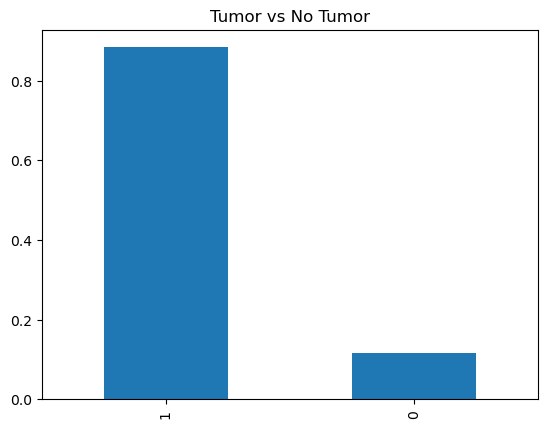

In [32]:
# Additional Sanity Check to confirm abv statement
plt.figure()
Tumors_df['Tumor_Presence'].value_counts(normalize=True).plot(kind='bar')
plt.title('Tumor vs No Tumor')
plt.show()

**Having a Look at how the gray scale images were normalized.**

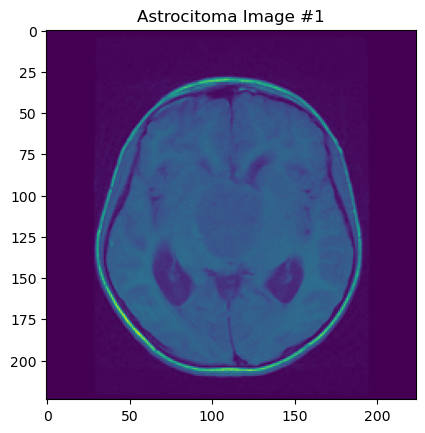

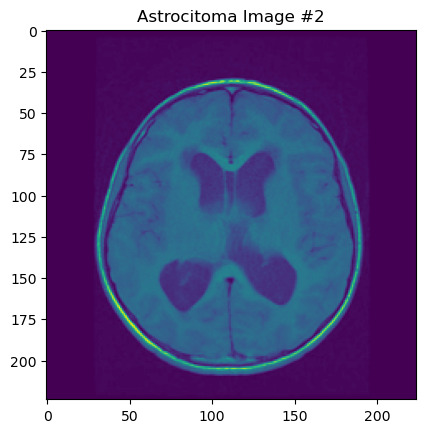

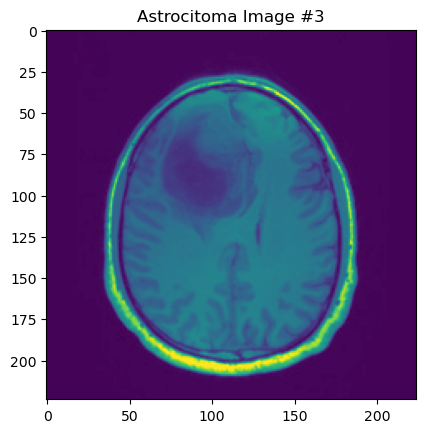

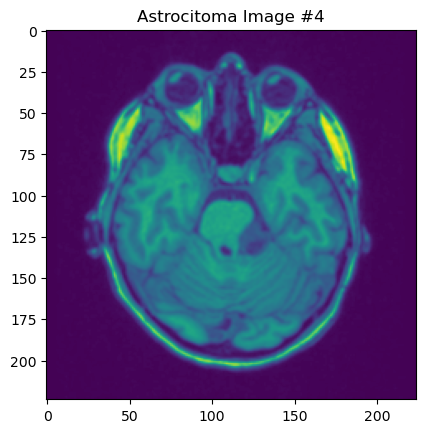

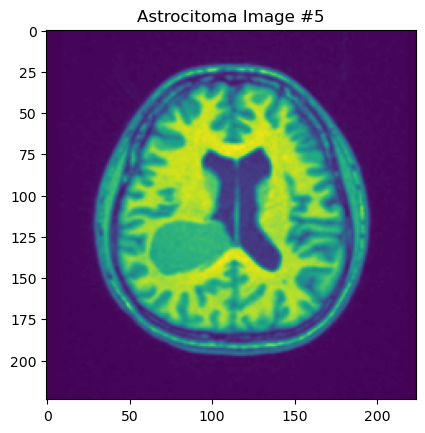

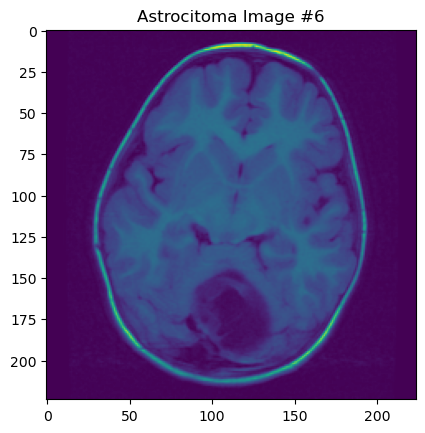

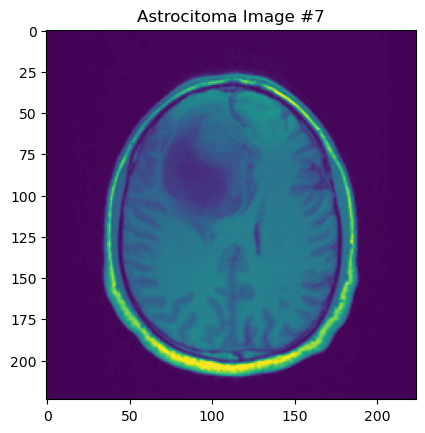

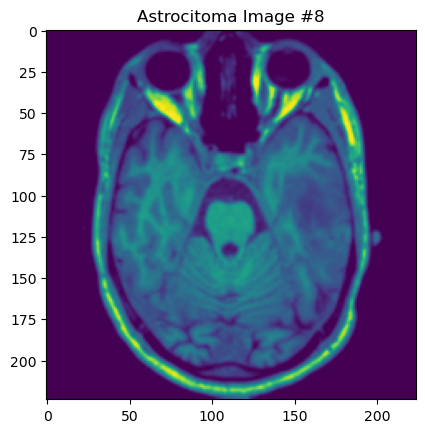

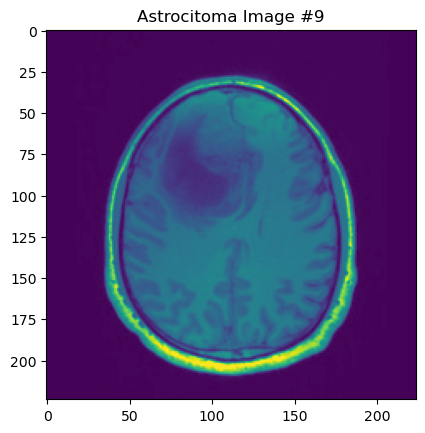

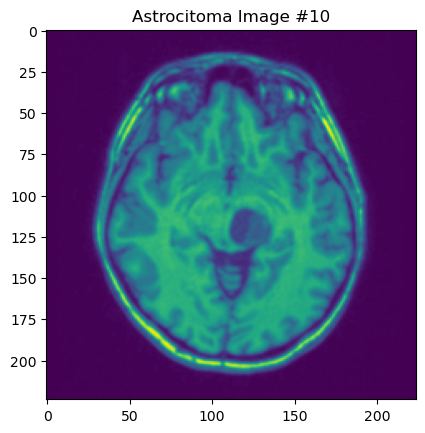

In [33]:
for i in range(10):
    plt.figure()
    plt.title(f"Astrocitoma Image #{i+1}")
    plt.imshow(imgs[i])
    plt.show()

Stacking all the numpy images on top of each other

In [34]:
stacked_images = np.stack(imgs, axis=0)

In [35]:
stacked_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [36]:
mean = stacked_images.mean(axis=0)

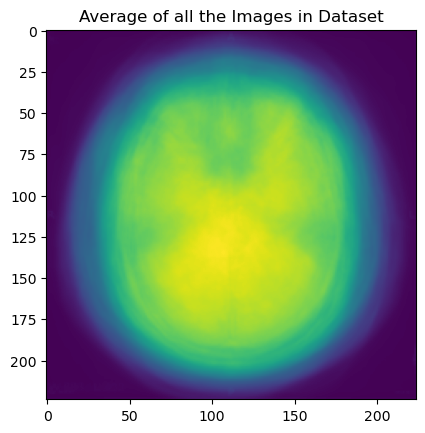

In [37]:
plt.figure()
plt.imshow(mean)
plt.title('Average of all the Images in Dataset')
plt.show()

In [38]:
# NORMAL Mean
NORMAL_Mean = stacked_images[3957:4479].mean(axis=0)

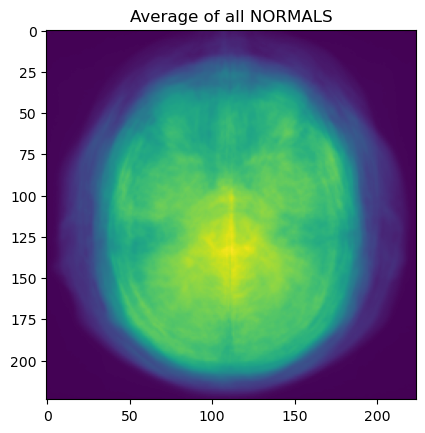

In [39]:
plt.figure()
plt.imshow(NORMAL_Mean)
plt.title('Average of all NORMALS')
plt.show()

In [40]:
# Astrocitoma Mean
Astrocitoma_Mean = stacked_images[:580].mean(axis=0)

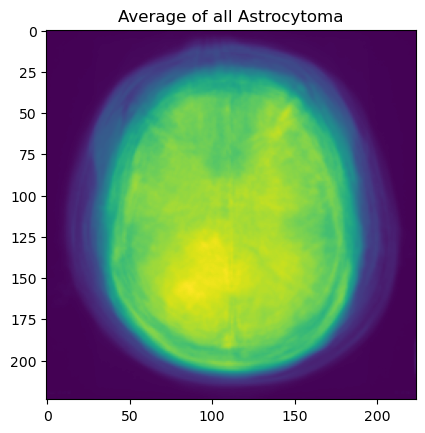

In [41]:
plt.figure()
plt.imshow(Astrocitoma_Mean)
plt.title('Average of all Astrocytoma')
plt.show()

In [42]:
# Meningioma Mean
Meningioma_Mean = stacked_images[1555:2429].mean(axis=0)

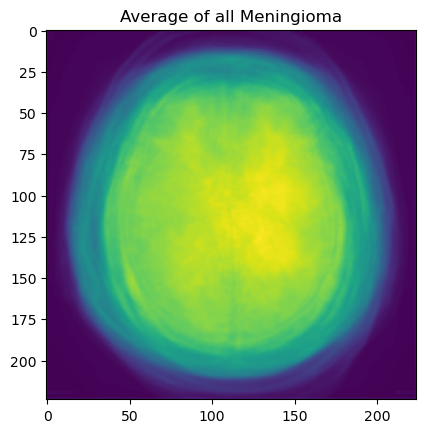

In [43]:
plt.figure()
plt.imshow(Meningioma_Mean)
plt.title('Average of all Meningioma')
plt.show()

In [44]:
X = stacked_images.reshape(-1, 224*224)

In [45]:
y = Tumors_df['Tumor_Presence']

In [46]:
# Saving the Tumor_df
Tumors_df.to_csv('Tumors_df.csv', index=False)

### Gameplan for modelling:
- Train test Split (done)
- Set up pipeline with PCA (done)
- Try out different classification models. 
    - (Logreg & XG-Boost(D-Trees)), 
    - K-best evaluation, 
    - CNNs


In [47]:
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.20, random_state=24)

In [60]:
from sklearn.pipeline import Pipeline

#we give our estimators as a list of tuples: name:function.
estimators = [('reduce_dim', PCA(n_components=0.8)), # finds 80% of the variance
              ('Model', LogisticRegression())]

pipe = Pipeline(estimators)

In [ ]:
# Feature Selection K-Best
from sklearn.pipeline import Pipeline

#we give our estimators as a list of tuples: name:function.
estimators = [('reduce_dim', PCA(n_components=500)),
              ('Model', LogisticRegression())]

pipe = Pipeline(estimators)

In [ ]:
print("Train Score:  ", pipe.score(X_train, y_train))
print("Test Score: ", pipe.score(X_test, y_test))

With PCA Components at 500 and a default logreg The scores were 

Train Score:  0.7523072342959214 <br>
Test Score:  0.6660714285714285

It is important to note that this initial model Ran out of iterations so we can't necessarily rely on these results.

### Regular Logistic Regression

In [48]:
# Instantiating the Logreg model
logreg = LogisticRegression(max_iter=1000)

# Fitting the model
results = logreg.fit(X_train, y_train)

# Getting the train and validation accuracies
logreg_train_acc = logreg.score(X_train, y_train)
logreg_val_acc = logreg.score(X_val, y_val)

print(f"Train accuracy: {round(logreg_train_acc, 4)}")   
print(f"Val accuracy: {round(logreg_val_acc, 4)}")

Train accuracy: 1.0
Val accuracy: 0.9315


In [49]:
logreg.n_iter_

array([450])

In [50]:
y_preds = results.predict(X_val)

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cf_matrix = confusion_matrix(y_val, y_preds)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Tumor", "Predicted Tumor"],
    index=["True Non-Tumor", "True Tumor"]
)

display(cf_df)

,Predicted Non-Tumor,Predicted Tumor
True Non-Tumor,59,30
True Tumor,16,567


In [53]:
from sklearn.metrics import classification_report

target_names = ['No Tumor', 'Tumor']
print(classification_report(y_val, y_preds, target_names=target_names))

              precision    recall  f1-score   support

    No Tumor       0.79      0.66      0.72        89
       Tumor       0.95      0.97      0.96       583

    accuracy                           0.93       672
   macro avg       0.87      0.82      0.84       672
weighted avg       0.93      0.93      0.93       672



In [54]:
logreg.coef_

array([[ 4.71976519e-05, -6.74900733e-05, -6.18462317e-05, ...,
         4.77138971e-05,  5.59091916e-05,  1.96824319e-04]])

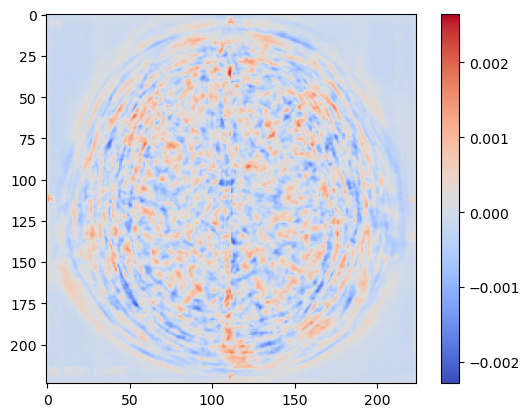

In [55]:
plt.figure()
plt.imshow(logreg.coef_.reshape(224, 224), cmap='coolwarm')
plt.colorbar()
plt.show()

C=0.0001 completed
C=0.001 completed
C=0.01 completed
C=0.1 completed
C=1 completed
C=10 completed
C=100 completed
C=1000 completed


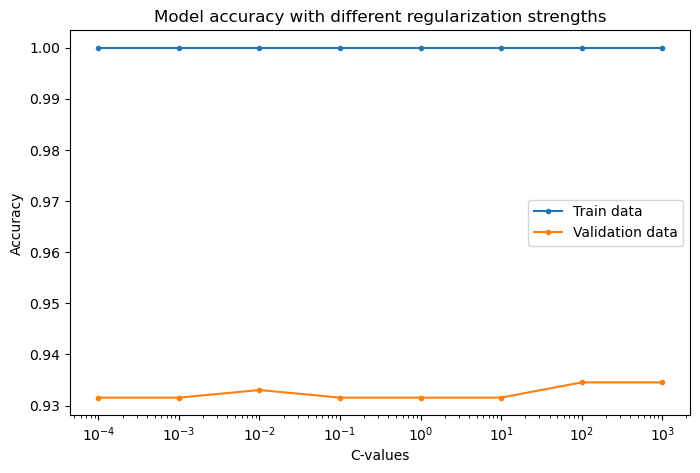

In [56]:
# range of c-values
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# train/val accuracy lists
train_acc = []
val_acc = []

# loop model iterations across all C-values
for c in c_values:
    logit_C = LogisticRegression(max_iter=10000, C=c).fit(X_train, y_train)
    train_acc.append(logit_C.score(X_train, y_train))
    val_acc.append(logit_C.score(X_val, y_val))
    print(f"C={c} completed")

# plot out train/val accuracies
plt.figure(figsize=(8,5))
plt.plot(c_values, train_acc, marker='.', label='Train data')
plt.plot(c_values, val_acc, marker='.', label='Validation data')
plt.xscale('log')
plt.xlabel('C-values')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model accuracy with different regularization strengths')
plt.show()

In [57]:
# Instantiating and fitting the IDEAL Logreg model
logreg = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)

# Getting the train and validation accuracies
logreg_train_acc = logreg.score(X_train, y_train)
logreg_val_acc = logreg.score(X_val, y_val)
logreg_test_acc = logreg.score(X_test, y_test)

print(f"Number of Iterations: {logreg.n_iter_}")
print(f"Train accuracy: {round(logreg_train_acc, 4)}")   
print(f"Val accuracy: {round(logreg_val_acc, 4)}")
print(f"Test accuracy: {round(logreg_test_acc, 4)}")

Number of Iterations: [161]
Train accuracy: 1.0
Val accuracy: 0.9345
Test accuracy: 0.9402


In [58]:
# Predicting whether there is a tumor or not.
y_preds = logreg.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_preds)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Tumor", "Predicted Tumor"],
    index=["True Non-Tumor", "True Tumor"]
)

display(cf_df)

,Predicted Non-Tumor,Predicted Tumor
True Non-Tumor,97,45
True Tumor,22,956


In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       142
           1       0.96      0.98      0.97       978

    accuracy                           0.94      1120
   macro avg       0.89      0.83      0.85      1120
weighted avg       0.94      0.94      0.94      1120



In [62]:
# Predicting probabilities.
y_pred_probas = logreg.predict_proba(X_test)
y_pred_probas

array([[2.17218687e-09, 9.99999998e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [77]:
y_preds = (y_pred_probas[:, 1] >= 0.95).astype(int)

In [81]:
len(y_pred_probas[:, 1] >= 0.95)

1120

In [78]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_preds)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Non-Tumor", "Predicted Tumor"],
    index=["True Non-Tumor", "True Tumor"]
)

display(cf_df)

,Predicted Non-Tumor,Predicted Tumor
True Non-Tumor,100,42
True Tumor,34,944


In [79]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       142
           1       0.96      0.97      0.96       978

    accuracy                           0.93      1120
   macro avg       0.85      0.83      0.84      1120
weighted avg       0.93      0.93      0.93      1120



Saving the model using **`pickle`**

In [82]:
import pickle

In [83]:
# Save the Model to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(logreg, file)

**####CNN Model in a separate notebook####**